# Cenário de Teste
## Spreading Factor: SF7, SF8, SF9, SF10, SF11 e SF12
## Distância: 100m
## Intervalo de Envio: 30 sec
## Quantidade Total de Envios por SF: 1000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

def ler_arquivo(path):
    try:
        # Lê o arquivo CSV no caminho especificado e retorna o DataFrame
        df = pd.read_csv(path)
        return df
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        return None

In [ ]:
# Carrega o dataset
df_all = ler_arquivo("/content/sample_data/data_current_1.csv")
df_all['datetime'] = pd.to_datetime(df_all['datetime'], utc=True)
df_all['datetime'] = df_all['datetime'].dt.tz_convert('America/Sao_Paulo')

df_sf7 = df_all[df_all['datr'] == 'SF7BW125'].copy()
df_sf8 = df_all[df_all['datr'] == 'SF8BW125'].copy()
df_sf9 = df_all[df_all['datr'] == 'SF9BW125'].copy()
df_sf10 = df_all[df_all['datr'] == 'SF10BW125'].copy()
df_sf11 = df_all[df_all['datr'] == 'SF11BW125'].copy()
df_sf12 = df_all[df_all['datr'] == 'SF12BW125'].copy()

In [ ]:

def plot_snr_by_sf(df, sf_name):
    # Converter colunas relevantes
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df['lsnr'] = pd.to_numeric(df['lsnr'], errors='coerce')

    # Remover linhas com valores inválidos
    df = df.dropna(subset=['datetime', 'lsnr'])

    # Ordenar por datetime
    df = df.sort_values(by='datetime')

    # Obter tempos inicial e final
    start_time = df['datetime'].iloc[0]
    end_time = df['datetime'].iloc[-1]

    # Plotar gráfico interativo
    fig = px.line(df, x='datetime', y='lsnr',
                  title=f"SNR em função do tempo ({sf_name}) - Intervalo: {start_time} a {end_time}",
                  labels={'datetime': 'Tempo', 'lsnr': 'SNR (dB)'})

    fig.update_traces(mode='lines+markers', hovertemplate='Tempo: %{x}<br>SNR: %{y} dB')
    fig.update_layout(hovermode="x unified")

    fig.show()

def plot_rssi_by_sf(df, sf_name):
    # Converter colunas relevantes
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df['rssi'] = pd.to_numeric(df['rssi'], errors='coerce')

    # Remover linhas com valores inválidos
    df = df.dropna(subset=['datetime', 'rssi'])

    # Ordenar por datetime
    df = df.sort_values(by='datetime')

    # Obter tempos inicial e final
    start_time = df['datetime'].iloc[0]
    end_time = df['datetime'].iloc[-1]

    # Plotar gráfico interativo
    fig = px.line(df, x='datetime', y='rssi',
                  title=f"RSSI em função do tempo ({sf_name}) - Intervalo: {start_time} a {end_time}",
                  labels={'datetime': 'Tempo', 'rssi': 'RSSI (dBm)'})

    fig.update_traces(mode='lines+markers', hovertemplate='Tempo: %{x}<br>RSSI: %{y} dBm')
    fig.update_layout(hovermode="x unified")

    # Alterar a cor da linha
    fig.update_traces(line=dict(color='green'))

    fig.show()

In [ ]:
plot_snr_by_sf(df_sf7, "SF7")
plot_snr_by_sf(df_sf8, "SF8")
plot_snr_by_sf(df_sf9, "SF9")
plot_snr_by_sf(df_sf10, "SF10")
plot_snr_by_sf(df_sf11, "SF11")
plot_snr_by_sf(df_sf12, "SF12")

plot_rssi_by_sf(df_sf7, "SF7")
plot_rssi_by_sf(df_sf8, "SF8")
plot_rssi_by_sf(df_sf9, "SF9")
plot_rssi_by_sf(df_sf10, "SF10")
plot_rssi_by_sf(df_sf11, "SF11")
plot_rssi_by_sf(df_sf12, "SF12")

In [ ]:
# Função para calcular as métricas estatísticas
def calcular_metricas(df):
    return {
        'Média': df.mean(),
        'Mediana': df.median(),
        'Desvio Padrão (std)': df.std(),
        'Mínimo': df.min(),
        'Máximo': df.max()
    }

    # Calcular a taxa de sucesso de envio para ambos os datasets com base no FCnt
def calcular_taxa_sucesso(df):
    if 'fcnt' not in df.columns or df['fcnt'].isnull().all():
        return 0.0  # Retorna 0% se coluna estiver ausente ou vazia

    # Elimina duplicatas de fcnt (caso haja)
    fcnt_unicos = df['fcnt'].dropna().drop_duplicates().astype(int)

    # Define o intervalo completo esperado de pacotes
    fcnt_min = fcnt_unicos.min()
    fcnt_max = fcnt_unicos.max()
    total_esperado = fcnt_max - fcnt_min + 1

    # Contar quantos pacotes únicos realmente chegaram
    total_recebido = len(fcnt_unicos)

    # Calcular taxa de sucesso
    taxa_sucesso = (total_recebido / total_esperado) * 100
    return taxa_sucesso

In [ ]:
# Calcular métricas para SNR e RSSI para ambos os datasets (df_sf7 e df_sf12)
snr_sf7_metrics = calcular_metricas(df_sf7['lsnr'])
rssi_sf7_metrics = calcular_metricas(df_sf7['rssi'])
snr_sf8_metrics = calcular_metricas(df_sf8['lsnr'])
rssi_sf8_metrics = calcular_metricas(df_sf8['rssi'])
snr_sf9_metrics = calcular_metricas(df_sf9['lsnr'])
rssi_sf9_metrics = calcular_metricas(df_sf9['rssi'])
snr_sf10_metrics = calcular_metricas(df_sf10['lsnr'])
rssi_sf10_metrics = calcular_metricas(df_sf10['rssi'])
snr_sf11_metrics = calcular_metricas(df_sf11['lsnr'])
rssi_sf11_metrics = calcular_metricas(df_sf11['rssi'])
snr_sf12_metrics = calcular_metricas(df_sf12['lsnr'])
rssi_sf12_metrics = calcular_metricas(df_sf12['rssi'])

# Calcular a taxa de sucesso para cada SF (df_sf7 e df_sf12)
taxa_sucesso_sf7 = calcular_taxa_sucesso(df_sf7)
taxa_sucesso_sf8 = calcular_taxa_sucesso(df_sf8)
taxa_sucesso_sf9 = calcular_taxa_sucesso(df_sf9)
taxa_sucesso_sf10 = calcular_taxa_sucesso(df_sf10)
taxa_sucesso_sf11 = calcular_taxa_sucesso(df_sf11)
taxa_sucesso_sf12 = calcular_taxa_sucesso(df_sf12)

metrics_snr = pd.DataFrame({
    'Métricas': ['Média', 'Mediana', 'Desvio Padrão (std)', 'Mínimo', 'Máximo'],
    f'SNR (SF7)': [snr_sf7_metrics['Média'], snr_sf7_metrics['Mediana'], snr_sf7_metrics['Desvio Padrão (std)'], snr_sf7_metrics['Mínimo'], snr_sf7_metrics['Máximo']],
    f'SNR (SF8)': [snr_sf8_metrics['Média'], snr_sf8_metrics['Mediana'], snr_sf8_metrics['Desvio Padrão (std)'], snr_sf8_metrics['Mínimo'], snr_sf8_metrics['Máximo']],
    f'SNR (SF9)': [snr_sf9_metrics['Média'], snr_sf9_metrics['Mediana'], snr_sf9_metrics['Desvio Padrão (std)'], snr_sf9_metrics['Mínimo'], snr_sf9_metrics['Máximo']],
    f'SNR (SF10)': [snr_sf10_metrics['Média'], snr_sf10_metrics['Mediana'], snr_sf10_metrics['Desvio Padrão (std)'], snr_sf10_metrics['Mínimo'], snr_sf10_metrics['Máximo']],
    f'SNR (SF11)': [snr_sf11_metrics['Média'], snr_sf11_metrics['Mediana'], snr_sf11_metrics['Desvio Padrão (std)'], snr_sf11_metrics['Mínimo'], snr_sf11_metrics['Máximo']],
    f'SNR (SF12)': [snr_sf12_metrics['Média'], snr_sf12_metrics['Mediana'], snr_sf12_metrics['Desvio Padrão (std)'], snr_sf12_metrics['Mínimo'], snr_sf12_metrics['Máximo']],
})

metrics_rssi = pd.DataFrame({
    'Métricas': ['Média', 'Mediana', 'Desvio Padrão (std)', 'Mínimo', 'Máximo'],
    f'RSSI (SF7)': [rssi_sf7_metrics['Média'], rssi_sf7_metrics['Mediana'], rssi_sf7_metrics['Desvio Padrão (std)'], rssi_sf7_metrics['Mínimo'], rssi_sf7_metrics['Máximo']],
    f'RSSI (SF8)': [rssi_sf8_metrics['Média'], rssi_sf8_metrics['Mediana'], rssi_sf8_metrics['Desvio Padrão (std)'], rssi_sf8_metrics['Mínimo'], rssi_sf8_metrics['Máximo']],
    f'RSSI (SF9)': [rssi_sf9_metrics['Média'], rssi_sf9_metrics['Mediana'], rssi_sf9_metrics['Desvio Padrão (std)'], rssi_sf9_metrics['Mínimo'], rssi_sf9_metrics['Máximo']],
    f'RSSI (SF10)': [rssi_sf10_metrics['Média'], rssi_sf10_metrics['Mediana'], rssi_sf10_metrics['Desvio Padrão (std)'], rssi_sf10_metrics['Mínimo'], rssi_sf10_metrics['Máximo']],
    f'RSSI (SF11)': [rssi_sf11_metrics['Média'], rssi_sf11_metrics['Mediana'], rssi_sf11_metrics['Desvio Padrão (std)'], rssi_sf11_metrics['Mínimo'], rssi_sf11_metrics['Máximo']],
    f'RSSI (SF12)': [rssi_sf12_metrics['Média'], rssi_sf12_metrics['Mediana'], rssi_sf12_metrics['Desvio Padrão (std)'], rssi_sf12_metrics['Mínimo'], rssi_sf12_metrics['Máximo']],
})


print(metrics_snr)
print("")
print(metrics_rssi)
print("")
print(f"Taxa de Sucesso de envio de pacote (SF7): {taxa_sucesso_sf7}")
print(f"Taxa de Sucesso de envio de pacote (SF8): {taxa_sucesso_sf8}")
print(f"Taxa de Sucesso de envio de pacote (SF9): {taxa_sucesso_sf9}")
print(f"Taxa de Sucesso de envio de pacote (SF10): {taxa_sucesso_sf10}")
print(f"Taxa de Sucesso de envio de pacote (SF11): {taxa_sucesso_sf11}")
print(f"Taxa de Sucesso de envio de pacote (SF12): {taxa_sucesso_sf12}")

              Métricas  SNR (SF7)  SNR (SF8)  SNR (SF9)  SNR (SF10)  \
0                Média   2.820951   5.544355   2.003414    1.628658   
1              Mediana   3.500000   5.800000   3.500000    2.000000   
2  Desvio Padrão (std)   2.411148   1.377786   4.088789    2.187671   
3               Mínimo  -8.200000 -11.500000 -13.200000  -10.200000   
4               Máximo   6.800000   8.000000   8.800000    5.000000   

   SNR (SF11)  SNR (SF12)  
0    3.141742   -0.214226  
1    3.500000    0.200000  
2    1.916135    3.063859  
3  -12.000000  -16.000000  
4    6.000000    4.500000  

              Métricas  RSSI (SF7)  RSSI (SF8)  RSSI (SF9)  RSSI (SF10)  \
0                Média -111.490891 -110.054435 -113.032129  -113.029263   
1              Mediana -112.000000 -109.000000 -113.000000  -113.000000   
2  Desvio Padrão (std)    2.616857    1.950203    2.926052     2.615446   
3               Mínimo -119.000000 -119.000000 -120.000000  -119.000000   
4               Máximo -105.0

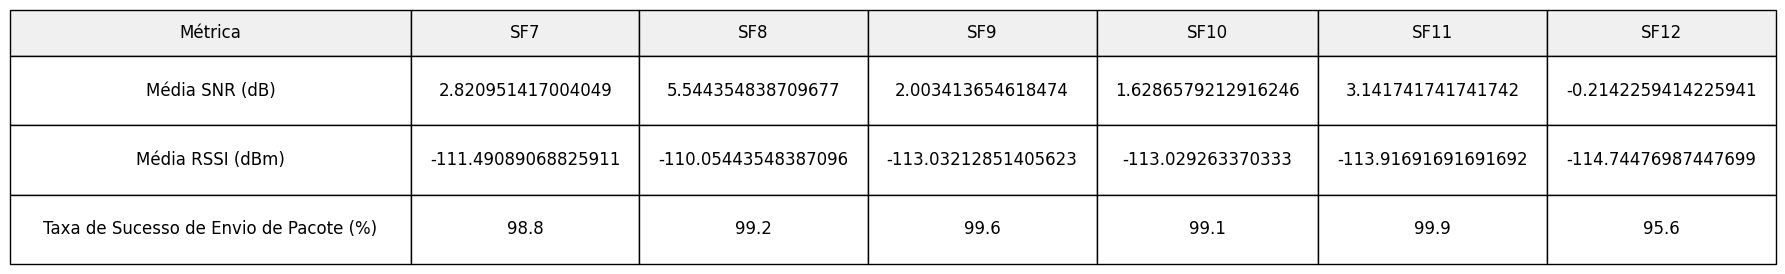

In [ ]:
# Criar a tabela com os dados
data = {
    'Métrica': ['Média SNR (dB)', 'Média RSSI (dBm)', 'Taxa de Sucesso de Envio de Pacote (%)'],
    'SF7': [snr_sf7_metrics['Média'], rssi_sf7_metrics['Média'], taxa_sucesso_sf7],
    'SF8': [snr_sf8_metrics['Média'], rssi_sf8_metrics['Média'], taxa_sucesso_sf8],
    'SF9': [snr_sf9_metrics['Média'], rssi_sf9_metrics['Média'], taxa_sucesso_sf9],
    'SF10': [snr_sf10_metrics['Média'], rssi_sf10_metrics['Média'], taxa_sucesso_sf10],
    'SF11': [snr_sf11_metrics['Média'], rssi_sf11_metrics['Média'], taxa_sucesso_sf11],
    'SF12': [snr_sf12_metrics['Média'], rssi_sf12_metrics['Média'], taxa_sucesso_sf12],

}

df_table = pd.DataFrame(data)

# Plotar a tabela como imagem
fig, ax = plt.subplots(figsize=(8, 3))  # Tamanho da tabela
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center', colColours=['#f0f0f0']*7)

# Aumentar a altura das células
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Cabeçalho
        cell.set_height(0.2)
    else:  # Linhas de dados
        cell.set_height(0.3)

# Ajustar fonte e estilo
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1, 2, 3, 4, 5, 6, 7])

plt.show()


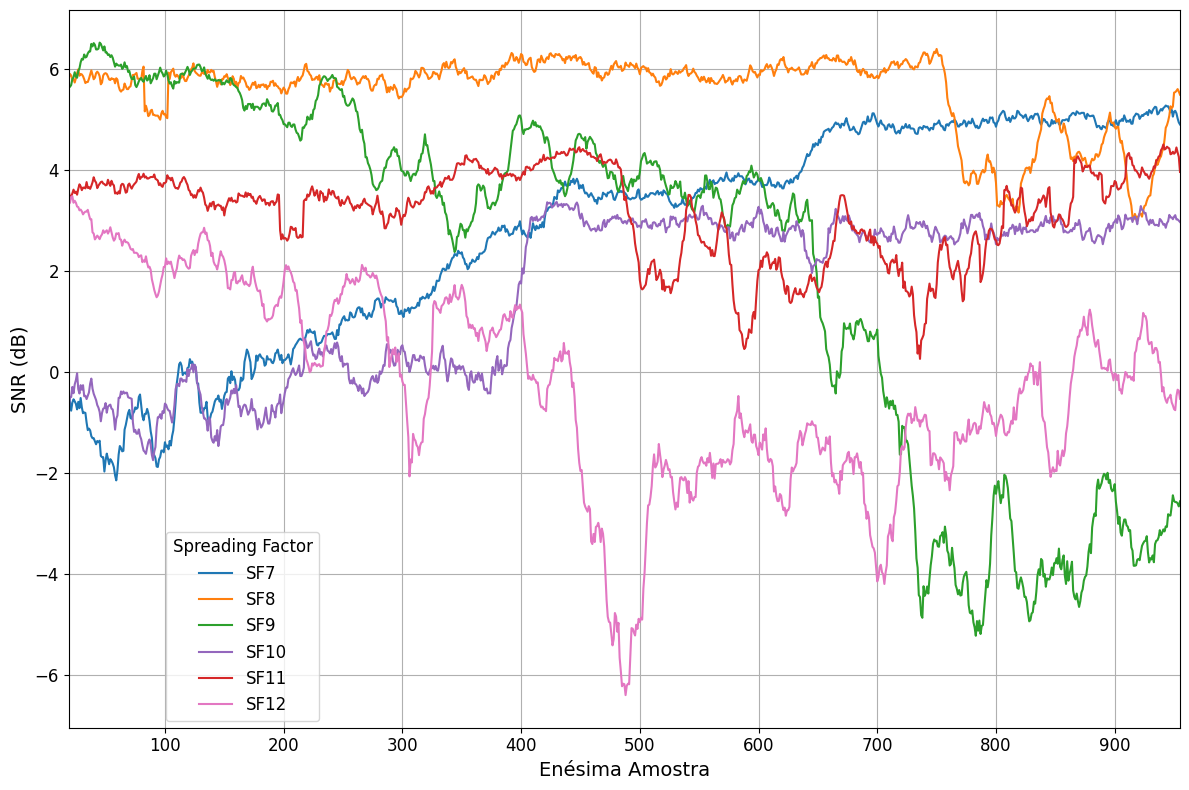

In [ ]:
# Definir a janela da média móvel
window = 20
max_samples = min(len(df_sf7), len(df_sf8), len(df_sf9), len(df_sf10), len(df_sf11), len(df_sf12))
x = np.arange(max_samples)

# Extrair e suavizar SNR para cada SF
sf7_snr = df_sf7['lsnr'].iloc[:max_samples].reset_index(drop=True)
sf8_snr = df_sf8['lsnr'].iloc[:max_samples].reset_index(drop=True)
sf9_snr = df_sf9['lsnr'].iloc[:max_samples].reset_index(drop=True)
sf10_snr = df_sf10['lsnr'].iloc[:max_samples].reset_index(drop=True)
sf11_snr = df_sf11['lsnr'].iloc[:max_samples].reset_index(drop=True)
sf12_snr = df_sf12['lsnr'].iloc[:max_samples].reset_index(drop=True)


sf7_mean = sf7_snr.rolling(window).mean()
sf7_std = sf7_snr.rolling(window).std()
sf8_mean = sf8_snr.rolling(window).mean()
sf8_std = sf8_snr.rolling(window).std()
sf9_mean = sf9_snr.rolling(window).mean()
sf9_std = sf9_snr.rolling(window).std()
sf10_mean = sf10_snr.rolling(window).mean()
sf10_std = sf10_snr.rolling(window).std()
sf11_mean = sf11_snr.rolling(window).mean()
sf11_std = sf11_snr.rolling(window).std()
sf12_mean = sf12_snr.rolling(window).mean()
sf12_std = sf12_snr.rolling(window).std()


# Plotar gráfico suavizado
plt.figure(figsize=(12, 8))
plt.plot(x, sf7_mean, label='SF7', color='tab:blue')
# plt.fill_between(x, sf7_mean - sf7_std, sf7_mean + sf7_std, alpha=0.2, color='tab:blue')

plt.plot(x, sf8_mean, label='SF8', color='tab:orange')
# plt.fill_between(x, sf8_mean - sf8_std, sf8_mean + sf8_std, alpha=0.2, color='tab:orange')

plt.plot(x, sf9_mean, label='SF9', color='tab:green')
plt.plot(x, sf10_mean, label='SF10', color='tab:purple')
plt.plot(x, sf11_mean, label='SF11', color='tab:red')
plt.plot(x, sf12_mean, label='SF12', color='tab:pink')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Enésima Amostra", fontsize=14)
plt.ylabel("SNR (dB)", fontsize=14)
plt.legend(title="Spreading Factor", title_fontsize=12, fontsize=12, loc='upper left', bbox_to_anchor=(0.08, 0.285))

plt.grid(True)
plt.xticks(np.arange(0, max_samples, 100))
plt.margins(x=0)
plt.tight_layout()
plt.show()


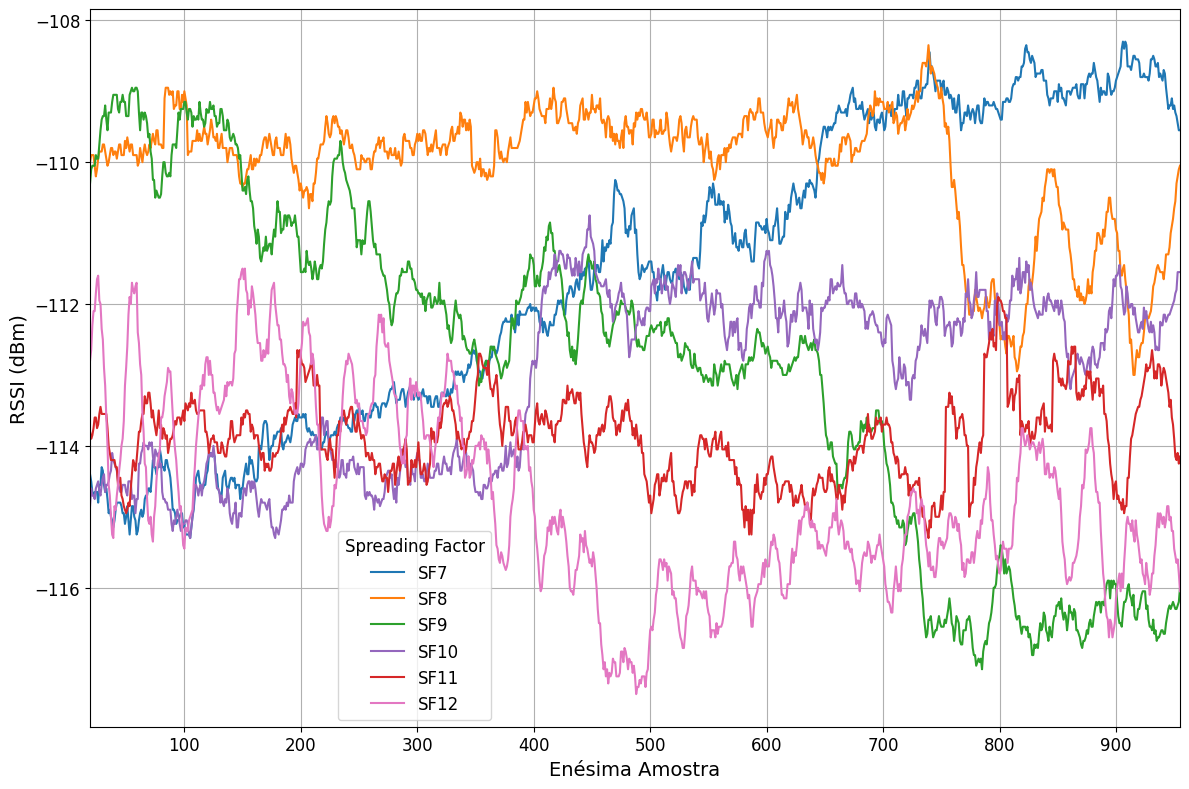

In [ ]:
# Definir a janela da média móvel
window = 20
max_samples = min(len(df_sf7), len(df_sf8), len(df_sf9), len(df_sf10), len(df_sf11), len(df_sf12))
x = np.arange(max_samples)

# Extrair e suavizar RSSI para cada SF
sf7_rssi = df_sf7['rssi'].iloc[:max_samples].reset_index(drop=True)
sf8_rssi = df_sf8['rssi'].iloc[:max_samples].reset_index(drop=True)
sf9_rssi = df_sf9['rssi'].iloc[:max_samples].reset_index(drop=True)
sf10_rssi = df_sf10['rssi'].iloc[:max_samples].reset_index(drop=True)
sf11_rssi = df_sf11['rssi'].iloc[:max_samples].reset_index(drop=True)
sf12_rssi = df_sf12['rssi'].iloc[:max_samples].reset_index(drop=True)

sf7_mean = sf7_rssi.rolling(window).mean()
sf7_std = sf7_rssi.rolling(window).std()
sf8_mean = sf8_rssi.rolling(window).mean()
sf8_std = sf8_rssi.rolling(window).std()
sf9_mean = sf9_rssi.rolling(window).mean()
sf9_std = sf9_rssi.rolling(window).std()
sf10_mean = sf10_rssi.rolling(window).mean()
sf10_std = sf10_rssi.rolling(window).std()
sf11_mean = sf11_rssi.rolling(window).mean()
sf11_std = sf11_rssi.rolling(window).std()
sf12_mean = sf12_rssi.rolling(window).mean()
sf12_std = sf12_rssi.rolling(window).std()

# Plotar gráfico suavizado de RSSI
plt.figure(figsize=(12, 8))
plt.plot(x, sf7_mean, label='SF7', color='tab:blue')
# plt.fill_between(x, sf7_mean - sf7_std, sf7_mean + sf7_std, alpha=0.2, color='tab:blue')

plt.plot(x, sf8_mean, label='SF8', color='tab:orange')
# plt.fill_between(x, sf8_mean - sf8_std, sf8_mean + sf8_std, alpha=0.2, color='tab:orange')

plt.plot(x, sf9_mean, label='SF9', color='tab:green')
plt.plot(x, sf10_mean, label='SF10', color='tab:purple')
plt.plot(x, sf11_mean, label='SF11', color='tab:red')
plt.plot(x, sf12_mean, label='SF12', color='tab:pink')


plt.xlabel("Enésima Amostra", fontsize=14)
plt.ylabel("RSSI (dBm)", fontsize=14)
plt.legend(title="Spreading Factor", title_fontsize=12, fontsize=12, loc='upper left', bbox_to_anchor=(0.22, 0.285))
# Tamanho da fonte dos valores dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.xticks(np.arange(0, max_samples, 100))
plt.margins(x=0)
plt.tight_layout()
plt.show()


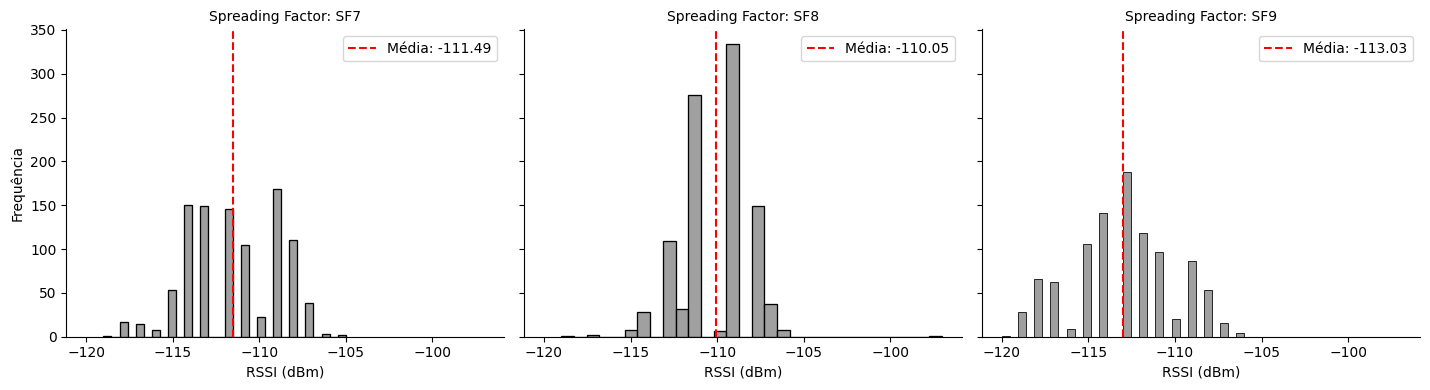

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que a coluna 'SF' está presente
df_sf7['SF'] = 'SF7'
df_sf8['SF'] = 'SF8'
df_sf9['SF'] = 'SF9'
df_merged = pd.concat([df_sf7, df_sf8, df_sf9], ignore_index=True)

# Criar o FacetGrid
g = sns.FacetGrid(df_merged, col='SF', col_order=['SF7', 'SF8', 'SF9'], height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x='rssi', bins=30, color='gray')

# Adicionar linha da média em cada gráfico
for ax, sf in zip(g.axes.flat, ['SF7', 'SF8', 'SF9']):
    media = df_merged[df_merged['SF'] == sf]['rssi'].mean()
    ax.axvline(media, color='red', linestyle='--', label=f'Média: {media:.2f}')
    ax.legend()

# Ajustar layout
g.set_axis_labels("RSSI (dBm)", "Frequência")
g.set_titles(col_template="Spreading Factor: {col_name}")
plt.tight_layout()
plt.show()
